In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img = cv2.imread("C:/Users/hevas/Downloads/cana.jpg")

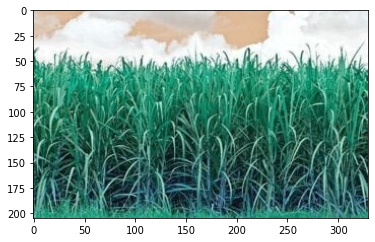

In [5]:
plt.imshow(img)
plt.show()

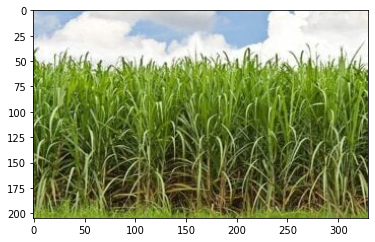

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [8]:
alto = img.shape[0]
ancho = img.shape[1]

In [9]:
ancho

330

In [10]:
lienzo = np.zeros((alto, ancho, 3)) # resultado a color.

In [11]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i, j]
        
        blue  = pixel[2]
        green = pixel[1]
        red   = pixel[0]
        
        lienzo[i, j] = [blue, 0, 0]

In [14]:
cv2.imwrite("monocromo.jpg", lienzo)
monocromo = cv2.imread("monocromo.jpg")
monocromo = cv2.cvtColor(monocromo, cv2.COLOR_BGR2RGB)

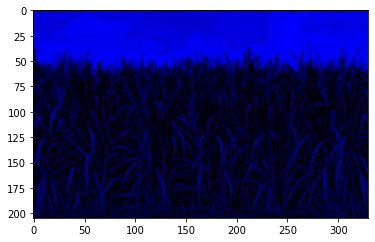

In [16]:
plt.imshow(monocromo)
plt.show()

In [22]:
media_ponderada = np.zeros((alto, ancho, 1)) # escala de grises

In [23]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i, j]
        
        blue  = pixel[2]
        green = pixel[1]
        red   = pixel[0]
        
        media_ponderada[i, j] = int(0.299* blue + 0.58 * green + 0.114 * red)

In [24]:
cv2.imwrite("gris_ponderado.jpg", media_ponderada)
gris = cv2.imread("gris_ponderado.jpg")
gris = cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)

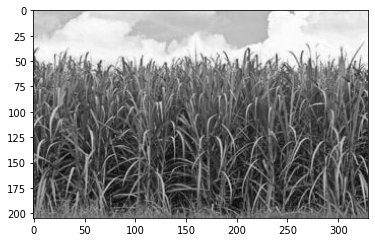

In [25]:
plt.imshow(gris)
plt.show()

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img = cv2.imread("C:/Users/hevas/Downloads/img1.jpg", cv2.IMREAD_GRAYSCALE)

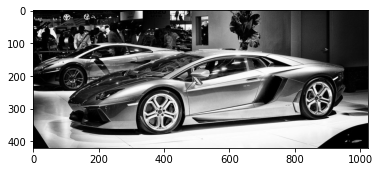

In [6]:
plt.imshow(img, cmap="gray")
plt.show()

In [7]:
img.shape

(420, 1024)

In [8]:
alto = img.shape[0]
ancho = img.shape[1]

In [10]:
ecualizada = np.zeros((alto, ancho, 1))
frecuencias = np.zeros((256))

In [15]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i, j]
        frecuencias[pixel] = frecuencias[pixel] + 1

In [17]:
densidad = np.true_divide(frecuencias, (alto* ancho))

In [19]:
cdfFunc = np.cumsum(densidad, dtype=float)

In [21]:
cdfFunc

array([0.05999349, 0.08381929, 0.10067894, 0.11558315, 0.12901786,
       0.1405971 , 0.15094866, 0.16022833, 0.16913132, 0.1774042 ,
       0.18498884, 0.19242001, 0.1995745 , 0.2067034 , 0.21483445,
       0.22541853, 0.23678618, 0.24549619, 0.2539109 , 0.2613072 ,
       0.26861747, 0.27547666, 0.28148484, 0.28724191, 0.29308733,
       0.29858631, 0.30412249, 0.30950288, 0.31486468, 0.32018462,
       0.32533715, 0.33069196, 0.33579567, 0.34130394, 0.34661226,
       0.35175084, 0.35708705, 0.3624814 , 0.36749209, 0.37269345,
       0.37762742, 0.38259394, 0.38776507, 0.3925665 , 0.39711449,
       0.40167643, 0.40608956, 0.41036551, 0.41415551, 0.41772228,
       0.42137509, 0.42481399, 0.42834356, 0.43169643, 0.43489351,
       0.4382115 , 0.44127139, 0.44434524, 0.4476888 , 0.45092541,
       0.45417132, 0.4573777 , 0.46063523, 0.46394857, 0.467234  ,
       0.47057292, 0.47353748, 0.4765997 , 0.47993397, 0.48292876,
       0.48611886, 0.48932059, 0.49229911, 0.49542876, 0.49858

In [23]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i, j]
        newPixel = 255*cdfFunc[pixel] # ecualizacion
        ecualizada[i, j] = round(newPixel, 0)

In [24]:
cv2.imwrite("ecualizada.jpg", ecualizada)

True

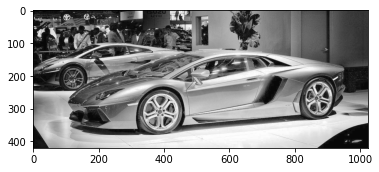

In [28]:
strImgEcualizada = "ecualizada.jpg"
imgEcualizada = cv2.imread(strImgEcualizada, cv2.IMREAD_GRAYSCALE)
plt.imshow(imgEcualizada, cmap="gray")
plt.show()

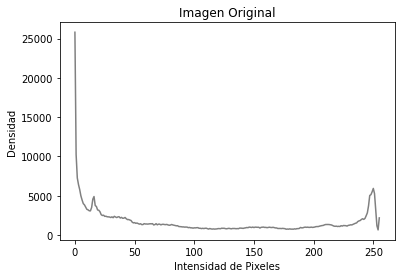

In [29]:
hist1 = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist1, color="gray")
plt.xlabel("Intensidad de Pixeles")
plt.ylabel("Densidad")
plt.title("Imagen Original")
plt.show()

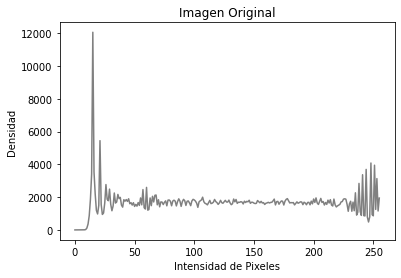

In [30]:
hist2 = cv2.calcHist([imgEcualizada], [0], None, [256], [0,256])
plt.plot(hist2, color="gray")
plt.xlabel("Intensidad de Pixeles")
plt.ylabel("Densidad")
plt.title("Imagen Original")
plt.show()